# About the Dataset

**EEG signal Data gathered from 10 college students collected when they were watching MOOC Videos. There were 20 total videos out of which 10 were confusing (like Quantum Mechanics) and 10 were non-confusing (simple algebra, geometry)**

The students wore a **single channel wireless headset (MindSet)** to caputre their  eeg signals and reported their confusion on a scale of one to seven.

The **MindSet** measures the voltage between the electrode resting on forehead and two electrodes (one ground and one reference) each in contact with each ear.

Output is labels as confused or not indicated as 0-Confused and 1-Not confused

In [1]:
import numpy as np
import pandas as pd
import seaborn 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

In [2]:
%config Completer.use_jedi = False # for autocompletion to work

## Getting the EEG Data

In [3]:
df = pd.read_csv('data/eeg_data/EEG_data.csv')

In [4]:
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12811 entries, 0 to 12810
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           12811 non-null  float64
 1   VideoID             12811 non-null  float64
 2   Attention           12811 non-null  float64
 3   Mediation           12811 non-null  float64
 4   Raw                 12811 non-null  float64
 5   Delta               12811 non-null  float64
 6   Theta               12811 non-null  float64
 7   Alpha1              12811 non-null  float64
 8   Alpha2              12811 non-null  float64
 9   Beta1               12811 non-null  float64
 10  Beta2               12811 non-null  float64
 11  Gamma1              12811 non-null  float64
 12  Gamma2              12811 non-null  float64
 13  predefinedlabel     12811 non-null  float64
 14  user-definedlabeln  12811 non-null  float64
dtypes: float64(15)
memory usage: 1.5 MB


## Getting the demographic data

In [6]:
demo_df = pd.read_csv('data/eeg_data/demographic_info.csv')

In [7]:
demo_df.head()

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M


In [8]:
## Renaming columns for easy merging
demo_df = demo_df.rename(columns = {'subject ID': 'SubjectID'})

In [9]:
demo_df.head()

,SubjectID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M


In [10]:
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


### Merging both the dataframes based on SubjectId

In [11]:
df = df.merge(demo_df,how = 'inner',on = 'SubjectID')

In [12]:
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity,gender
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0,25,Han Chinese,M
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0,25,Han Chinese,M
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0,25,Han Chinese,M
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0,25,Han Chinese,M
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0,25,Han Chinese,M


### Having one hot encoding for categorical variables like gender and stuff

In [13]:
df = pd.get_dummies(df)

In [14]:
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,...,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity_Bengali,ethnicity_English,ethnicity_Han Chinese,gender_F,gender_M
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,...,33228.0,8293.0,0.0,0.0,25,0,0,1,0,1
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,...,5293.0,2740.0,0.0,0.0,25,0,0,1,0,1
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,...,57243.0,25354.0,0.0,0.0,25,0,0,1,0,1
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,...,49960.0,33932.0,0.0,0.0,25,0,0,1,0,1
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,...,44790.0,29749.0,0.0,0.0,25,0,0,1,0,1


In [15]:
df.columns

Index(['SubjectID', 'VideoID', 'Attention', 'Mediation', 'Raw', 'Delta',
       'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2',
       'predefinedlabel', 'user-definedlabeln', ' age', ' ethnicity_Bengali',
       ' ethnicity_English', ' ethnicity_Han Chinese', ' gender_F',
       ' gender_M'],
      dtype='object')

In [16]:
## Missing value check
print("Missing values count : " + str(df.isna().sum().sum()))

Missing values count : 0


In [17]:
df[' gender_F'].value_counts()

0    10236
1     2575
Name:  gender_F, dtype: int64

In [18]:
df['user-definedlabeln'].value_counts()

1.0    6567
0.0    6244
Name: user-definedlabeln, dtype: int64

## Let's clean the data

The SubjectID and VideoID will provide hinderance while model training as there are 10 clips for 10 students and these 1-2 min clips are divided ino parts of 0.5 sec samples. So Model will most probably learn based on IDs but we want it to learn on based of ethinicity and gender and age parameters

In [19]:
df.drop(['SubjectID','VideoID','predefinedlabel'],axis = 1,inplace=True)

In [20]:
df = df[df['Attention']> 0.0]

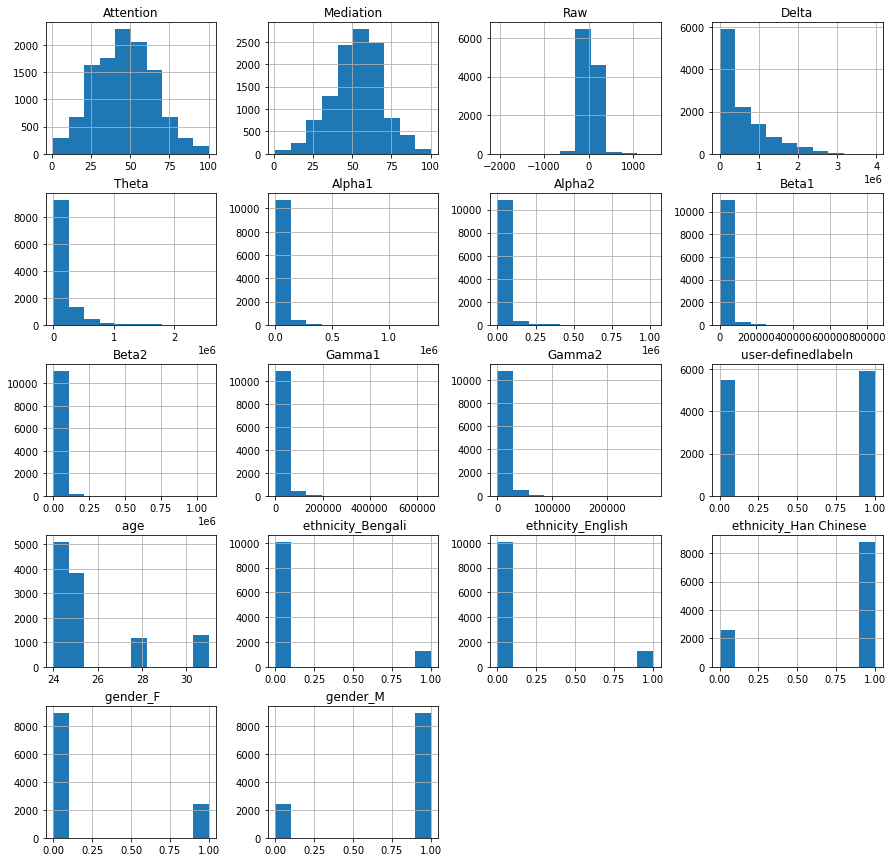

In [21]:
df.hist(figsize = (15,15))
plt.show()

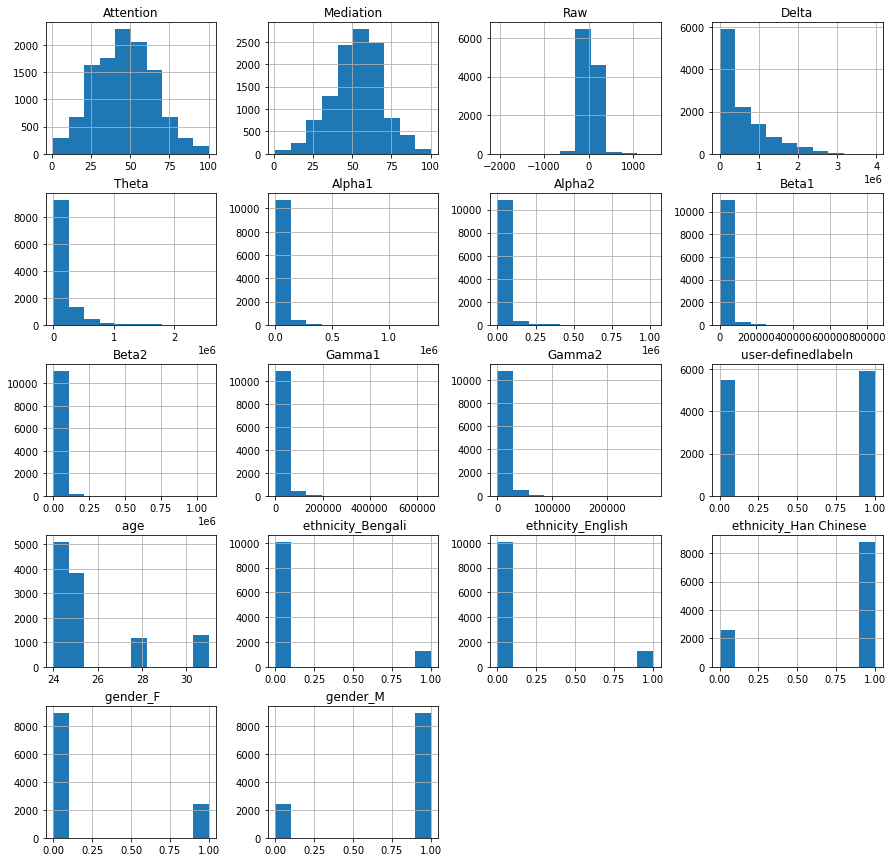

In [22]:
df = df[df['Mediation']> 0.0]
df.hist(figsize = (15,15))
plt.show()

### Let's have a Correlation Matrix

<AxesSubplot:>

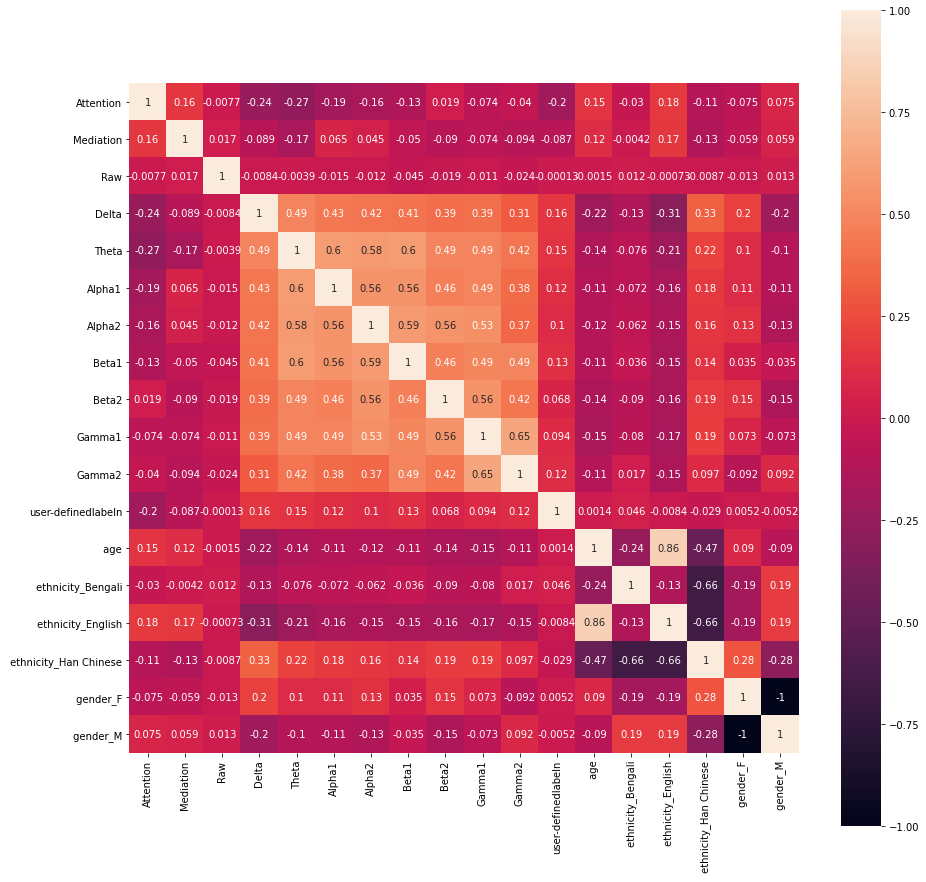

In [23]:
plt.figure(figsize = (15,15))
corr_matrix = df.corr()
seaborn.heatmap(corr_matrix,vmin = -1.0, square=True, annot = True)

As from the heatmap, We see there is a good correlation between **Gamma1 and Beta2**

In [24]:
df['user-definedlabeln'].unique()

array([0., 1.])

In [25]:
df['user-definedlabeln'].value_counts()

1.0    5925
0.0    5463
Name: user-definedlabeln, dtype: int64

### Splitting the dataset based on user-defined labels

In [26]:
X = np.array(df.drop(['user-definedlabeln'],axis = 1))

In [27]:
y = np.array(df['user-definedlabeln'])

In [28]:
X.min(), X.max()

(-2048.0, 3964663.0)

## Data Preprocessing

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
# Transforming data to have mean 0 and std 1

In [31]:
X = StandardScaler().fit_transform(X)

In [32]:
X.min(), X.max()

(-15.829161155386538, 29.216116594451524)

## Data Split

In [33]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

# X_train.shape, y_train.shape

# X_test.shape, y_test.shape

# X_train= np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))

# X_train.shape

# X_test= np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

# X_test.shape

# X_train[0]

### Using tf.data.Dataset 

In [34]:
import tensorflow as tf

In [35]:
dataset = tf.data.Dataset.from_tensor_slices((X,y))

In [36]:
dataset_size = X.shape[0]
dataset_size

11388

In [37]:
train_size = int(0.75 * dataset_size)
train_size

8541

In [38]:
X_train = dataset.take(train_size)
X_test = dataset.skip(train_size)

In [39]:
for i in X_train :
    print(np.array(i[0]).shape,np.array(i[1]).shape)

(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(

(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(

(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(

(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(

(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(

(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(17,) ()
(

In [40]:
X_train = X_train.shuffle(len(X_train))

In [41]:
# Making batches of 32 
X_train = X_train.batch(32)
X_train

<BatchDataset shapes: ((None, 17), (None,)), types: (tf.float64, tf.float64)>

## Model Definition

In [42]:
import tensorflow as tf
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Attention, Lambda, Dot, Concatenate,Dropout, Activation

from tensorflow.keras import backend as K

tf.keras.backend.clear_session()

### Custom Attention Layer

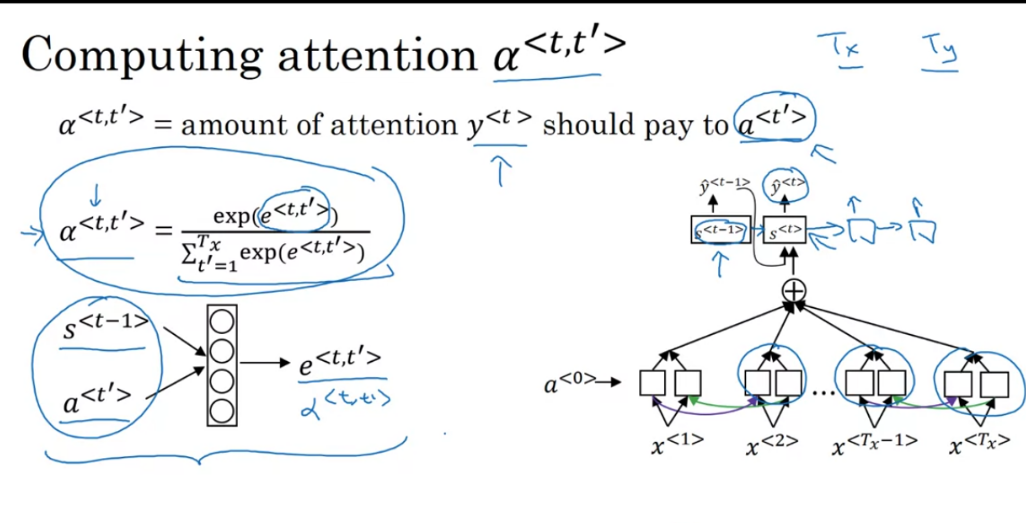

In [43]:
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K

# Bahdanau et al. implementation of Attention Layer

# attention weights are softmax of (v*(w*s<t-1> + u*h))
# s<t-1> is hidden state at <t-1> of decoder and h is hidden state outputs of the encoder

class Attention(Layer):
    
    def __init__(self, return_sequences=True):
        self.return_sequences = return_sequences
        super(Attention,self).__init__()
        
    def build(self, input_shape):
        
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
                               initializer="zeros")
        
        super(Attention,self).build(input_shape)
        
    def call(self, x):
        
        e = K.tanh(K.dot(x,self.W)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        
        if self.return_sequences:
            return output
        
        return K.sum(output, axis=1)

In [44]:

# model = Sequential([
#     LSTM(256,activation = 'relu',input_shape = (X_train.shape[1:]),return_sequences = True),
#     Dropout(0.2),
#     LSTM(256,activation = 'sigmoid',return_sequences=True),
#     Dropout(0.2),
#     LSTM(128,return_sequences=True,activation = 'sigmoid'),
#     Dropout(0.2),
#     LSTM(64),
#     Dropout(0.2),
#     Dense(1,activation = 'sigmoid')
# ])

In [45]:
type(X_train)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [46]:
inputs = tf.keras.Input(shape=(17, 1))#lstm takes 3d input of the shape [batch_size, timesteps, feature]
#time steps is the number of the input feature and the features is the number corresponding output value we want to predict
Dense1 = Dense(64, activation = 'relu')(inputs)
Dense2 = Dense(128, activation = 'relu')(Dense1)
lstm_1=  LSTM(256, return_sequences = True)(Dense2)
drop = Dropout(0.2)(lstm_1)
lstm_3=  LSTM(256, return_sequences = True)(drop)
drop2 = Dropout(0.2)(lstm_3)
att_ = Attention(256)(drop2)
Dense_1 = Dense(128, activation = 'relu')(att_)
outputs = Dense(1, activation='sigmoid')(Dense_1)

model = tf.keras.Model(inputs, outputs)


In [47]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17, 1)]           0         
_________________________________________________________________
dense (Dense)                (None, 17, 64)            128       
_________________________________________________________________
dense_1 (Dense)              (None, 17, 128)           8320      
_________________________________________________________________
lstm (LSTM)                  (None, 17, 256)           394240    
_________________________________________________________________
dropout (Dropout)            (None, 17, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 17, 256)           525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 17, 256)           0     

In [48]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [49]:
bs = 32
epochs = 50

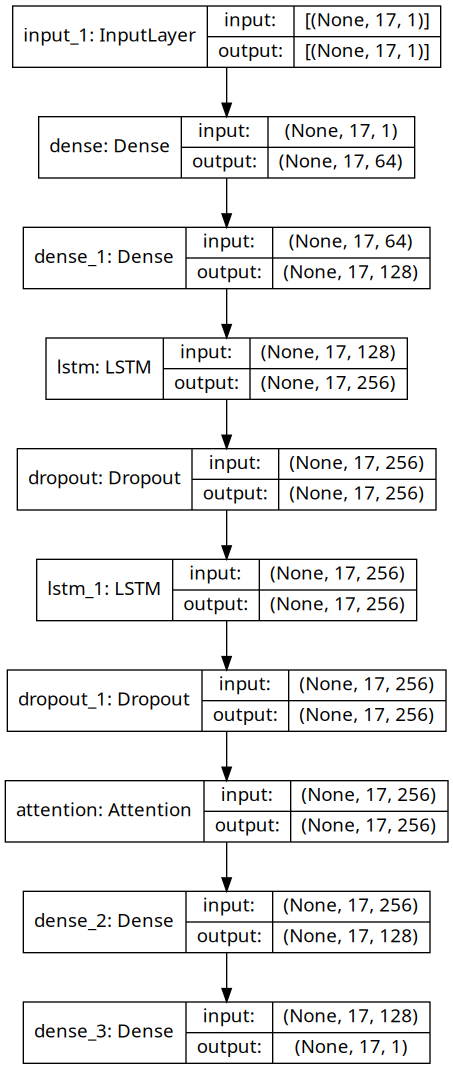

In [50]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='/tmp/model.png', show_shapes=True,)

In [51]:
#spliting it into the train and testing
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25)

In [73]:
#A sample for predicting output while training each epoch
x = np.expand_dims(train_X[0], axis = 0)
x.shape

(1, 17)

In [76]:
x.shape

(1, 17)

## Custom Callback for each epoch outputs

In [105]:
class CallBacks(tf.keras.callbacks.Callback):
    
    def __init__(self,filepath):
        super(CallBacks,self).__init__()
        self.model_name = filepath
        
    def on_train_begin(self, logs = {}):
        self.losses = []
        self.acc = []
        self.logs = []
        keys = list(logs.keys())
        print("Starting epoch {} , got keys {}".format(len(self.losses)+1,keys))
    
    def on_epoch_end(self,epoch,logs = {}):
        current = logs.get('loss')
        # Appending logs, losses and accuracies to lists
        self.logs.append(logs)
        self.losses.append(logs.get("loss"))
        self.acc.append(logs.get("accuracy"))
        keys = list(logs.keys())
        print("End of epoch {} , got keys {} and accuracy is {}".format(len(self.losses), keys, logs['accuracy']))
        
        # Clear the previous plots
        N = np.arange(0,len(self.losses))
        print(N)
        # prediction over the sample x 
        prediction = self.model.predict(x)
        y_pred = np.array(prediction >= 0.5, dtype = np.int)
        print("Predicted : {}".format(y_pred[0][0][0]))
        print("Actual : {}".format(train_y[0]))
        
        # Plot the losses
        fig, axes = plt.subplots(2)
        plt.figure()
        
        axes[1].plot(N,self.losses, label = 'train_loss')
        axes[1].plot(N,self.acc, label = 'train_acc')
        fig.suptitle("Training Loss and Accuracy [Epoch {}]".format(epoch))
        axes[1].legend()
        plt.show()
plot_losses = CallBacks(filepath = '.')

In [89]:
x.reshape(-1,1).shape

(17, 1)

### The callbacks 
We will use reduce_lr callback and early stopping thus made their instances

In [106]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=5, min_lr=0.001)

early_stop = tf.keras.callbacks.EarlyStopping(
                            monitor = 'accuracy',
                            patience = 5,
                            restore_best_weights=True
                )

Starting epoch 1 , got keys []
Epoch 1/50
267/267 [==============================] - 12s 47ms/step - loss: 0.5639 - accuracy: 0.7150
End of epoch 1 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.7150421738624573
[0]
Predicted : 1
Actual : 0.0


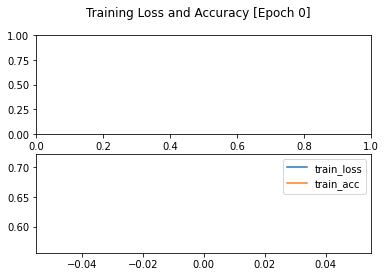

<Figure size 432x288 with 0 Axes>

Epoch 2/50
267/267 [==============================] - 13s 48ms/step - loss: 0.5580 - accuracy: 0.7231
End of epoch 2 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.723106861114502
[0 1]
Predicted : 0
Actual : 0.0


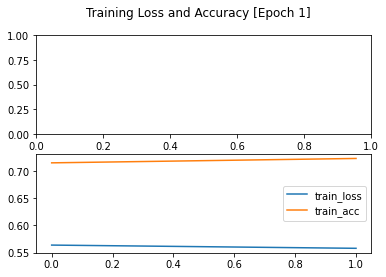

<Figure size 432x288 with 0 Axes>

Epoch 3/50
267/267 [==============================] - 16s 59ms/step - loss: 0.5490 - accuracy: 0.7316
End of epoch 3 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.7316404581069946
[0 1 2]
Predicted : 0
Actual : 0.0


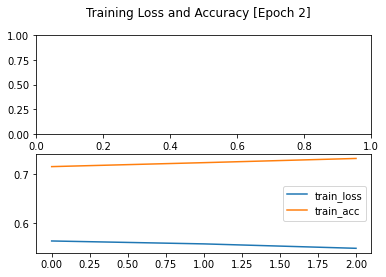

<Figure size 432x288 with 0 Axes>

Epoch 4/50
267/267 [==============================] - 16s 58ms/step - loss: 0.5421 - accuracy: 0.7339
End of epoch 4 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.7339340448379517
[0 1 2 3]
Predicted : 0
Actual : 0.0


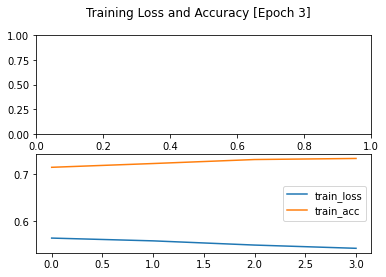

<Figure size 432x288 with 0 Axes>

Epoch 5/50
267/267 [==============================] - 16s 59ms/step - loss: 0.5272 - accuracy: 0.7430
End of epoch 5 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.7430319786071777
[0 1 2 3 4]
Predicted : 1
Actual : 0.0


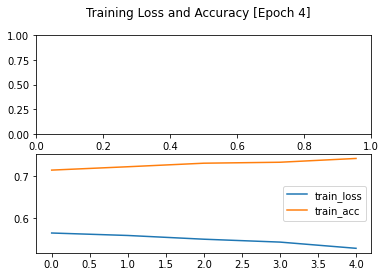

<Figure size 432x288 with 0 Axes>

Epoch 6/50
267/267 [==============================] - 16s 61ms/step - loss: 0.5261 - accuracy: 0.7454
End of epoch 6 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.7453598976135254
[0 1 2 3 4 5]
Predicted : 0
Actual : 0.0


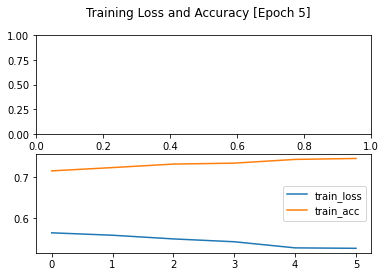

<Figure size 432x288 with 0 Axes>

Epoch 7/50
267/267 [==============================] - 16s 59ms/step - loss: 0.5112 - accuracy: 0.7537
End of epoch 7 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.7537276148796082
[0 1 2 3 4 5 6]
Predicted : 0
Actual : 0.0


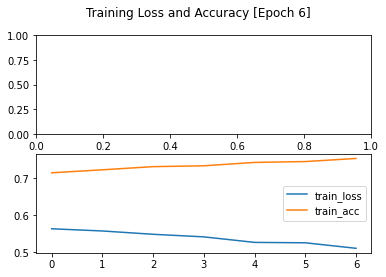

<Figure size 432x288 with 0 Axes>

Epoch 8/50
267/267 [==============================] - 16s 61ms/step - loss: 0.4999 - accuracy: 0.7625
End of epoch 8 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.7625294923782349
[0 1 2 3 4 5 6 7]
Predicted : 0
Actual : 0.0


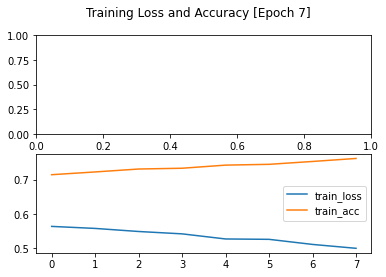

<Figure size 432x288 with 0 Axes>

Epoch 9/50
267/267 [==============================] - 17s 62ms/step - loss: 0.4941 - accuracy: 0.7650
End of epoch 9 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.7649608850479126
[0 1 2 3 4 5 6 7 8]
Predicted : 0
Actual : 0.0


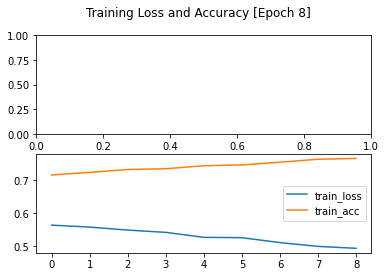

<Figure size 432x288 with 0 Axes>

Epoch 10/50
267/267 [==============================] - 16s 58ms/step - loss: 0.4727 - accuracy: 0.7813
End of epoch 10 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.7812765836715698
[0 1 2 3 4 5 6 7 8 9]
Predicted : 0
Actual : 0.0


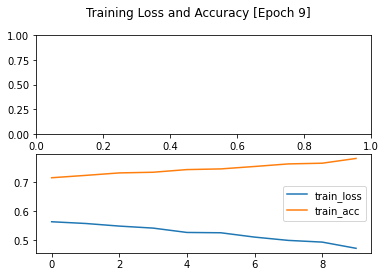

<Figure size 432x288 with 0 Axes>

Epoch 11/50
267/267 [==============================] - 15s 58ms/step - loss: 0.4637 - accuracy: 0.7855
End of epoch 11 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.7855189442634583
[ 0  1  2  3  4  5  6  7  8  9 10]
Predicted : 0
Actual : 0.0


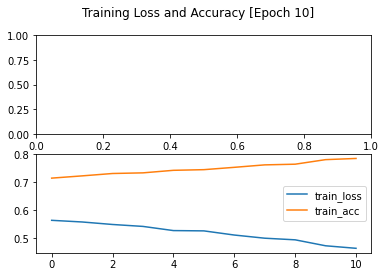

<Figure size 432x288 with 0 Axes>

Epoch 12/50
267/267 [==============================] - 16s 59ms/step - loss: 0.4457 - accuracy: 0.7999
End of epoch 12 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.7998649477958679
[ 0  1  2  3  4  5  6  7  8  9 10 11]
Predicted : 0
Actual : 0.0


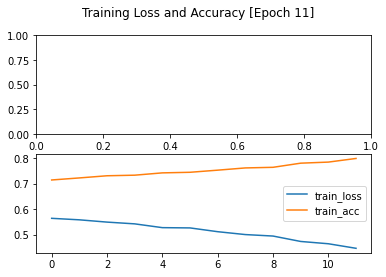

<Figure size 432x288 with 0 Axes>

Epoch 13/50
267/267 [==============================] - 16s 58ms/step - loss: 0.4297 - accuracy: 0.8090
End of epoch 13 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.8090316653251648
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Predicted : 0
Actual : 0.0


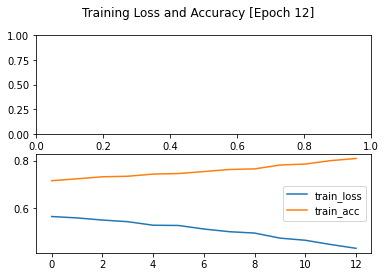

<Figure size 432x288 with 0 Axes>

Epoch 14/50
267/267 [==============================] - 16s 59ms/step - loss: 0.4227 - accuracy: 0.8109
End of epoch 14 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.8108637928962708
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Predicted : 0
Actual : 0.0


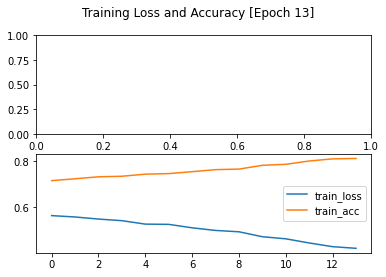

<Figure size 432x288 with 0 Axes>

Epoch 15/50
267/267 [==============================] - 16s 59ms/step - loss: 0.4018 - accuracy: 0.8252
End of epoch 15 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.8252032995223999
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Predicted : 0
Actual : 0.0


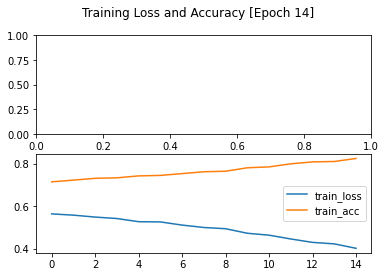

<Figure size 432x288 with 0 Axes>

Epoch 16/50
267/267 [==============================] - 16s 59ms/step - loss: 0.3907 - accuracy: 0.8265
End of epoch 16 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.8265116214752197
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Predicted : 0
Actual : 0.0


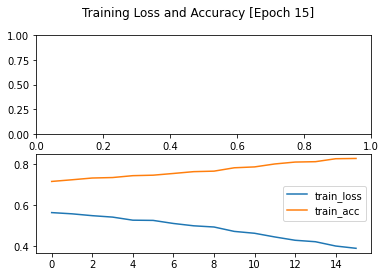

<Figure size 432x288 with 0 Axes>

Epoch 17/50
267/267 [==============================] - 16s 58ms/step - loss: 0.3704 - accuracy: 0.8377
End of epoch 17 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.837675929069519
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Predicted : 0
Actual : 0.0


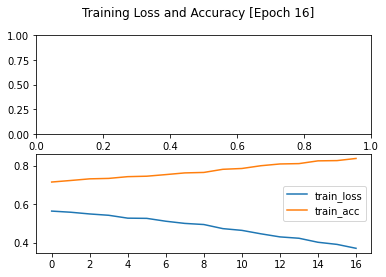

<Figure size 432x288 with 0 Axes>

Epoch 18/50
267/267 [==============================] - 16s 58ms/step - loss: 0.3752 - accuracy: 0.8362
End of epoch 18 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.8361673355102539
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Predicted : 0
Actual : 0.0


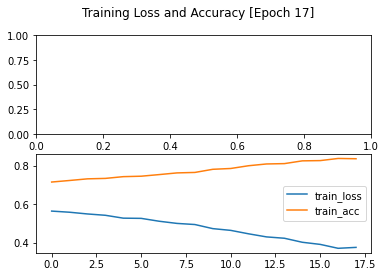

<Figure size 432x288 with 0 Axes>

Epoch 19/50
267/267 [==============================] - 16s 61ms/step - loss: 0.3489 - accuracy: 0.8508
End of epoch 19 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.8508368730545044
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
Predicted : 0
Actual : 0.0


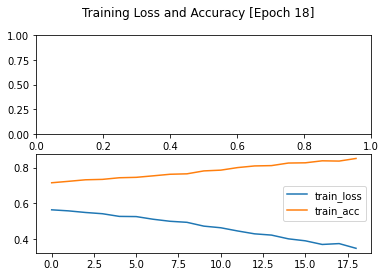

<Figure size 432x288 with 0 Axes>

Epoch 20/50
267/267 [==============================] - 16s 61ms/step - loss: 0.3377 - accuracy: 0.8572
End of epoch 20 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.8571869730949402
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Predicted : 0
Actual : 0.0


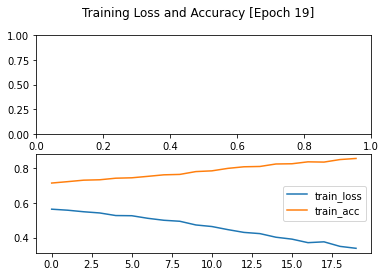

<Figure size 432x288 with 0 Axes>

Epoch 21/50
267/267 [==============================] - 16s 59ms/step - loss: 0.3260 - accuracy: 0.8609
End of epoch 21 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.8609338402748108
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Predicted : 0
Actual : 0.0


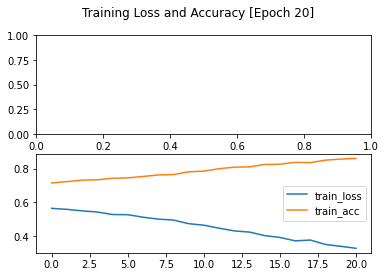

<Figure size 432x288 with 0 Axes>

Epoch 22/50
267/267 [==============================] - 16s 58ms/step - loss: 0.3114 - accuracy: 0.8713
End of epoch 22 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.8713403940200806
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Predicted : 0
Actual : 0.0


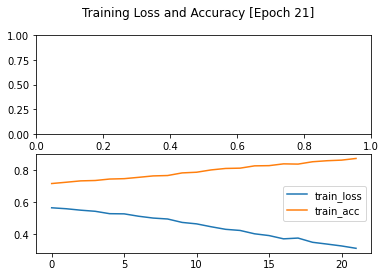

<Figure size 432x288 with 0 Axes>

Epoch 23/50
267/267 [==============================] - 16s 59ms/step - loss: 0.3055 - accuracy: 0.8714
End of epoch 23 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.8714368939399719
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
Predicted : 0
Actual : 0.0


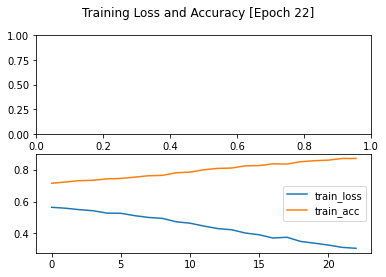

<Figure size 432x288 with 0 Axes>

Epoch 24/50
267/267 [==============================] - 16s 58ms/step - loss: 0.2856 - accuracy: 0.8811
End of epoch 24 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.8810927271842957
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Predicted : 0
Actual : 0.0


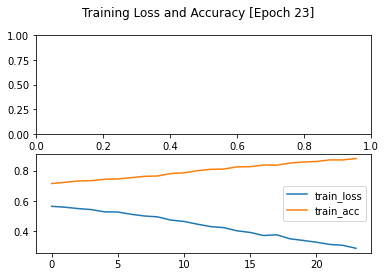

<Figure size 432x288 with 0 Axes>

Epoch 25/50
267/267 [==============================] - 16s 58ms/step - loss: 0.2809 - accuracy: 0.8832
End of epoch 25 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.8832138180732727
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
Predicted : 0
Actual : 0.0


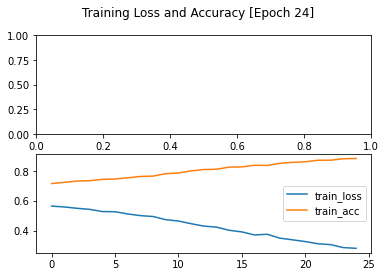

<Figure size 432x288 with 0 Axes>

Epoch 26/50
267/267 [==============================] - 16s 59ms/step - loss: 0.2599 - accuracy: 0.8912
End of epoch 26 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.8912236094474792
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Predicted : 0
Actual : 0.0


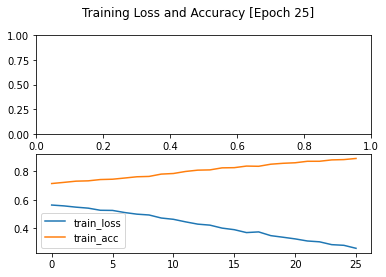

<Figure size 432x288 with 0 Axes>

Epoch 27/50
267/267 [==============================] - 16s 59ms/step - loss: 0.2510 - accuracy: 0.8979
End of epoch 27 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.8978696465492249
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
Predicted : 0
Actual : 0.0


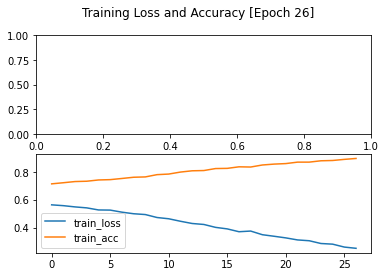

<Figure size 432x288 with 0 Axes>

Epoch 28/50
267/267 [==============================] - 16s 58ms/step - loss: 0.2565 - accuracy: 0.8947
End of epoch 28 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.8947085738182068
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
Predicted : 0
Actual : 0.0


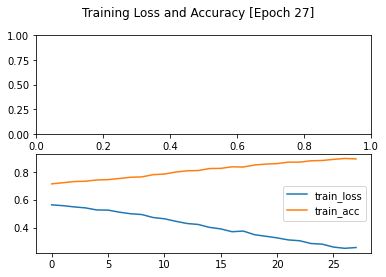

<Figure size 432x288 with 0 Axes>

Epoch 29/50
267/267 [==============================] - 15s 58ms/step - loss: 0.2339 - accuracy: 0.9053
End of epoch 29 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9053217768669128
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
Predicted : 0
Actual : 0.0


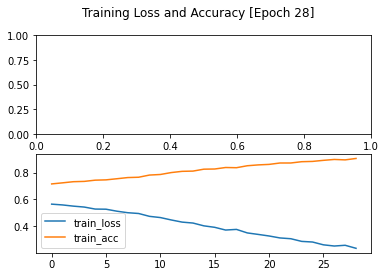

<Figure size 432x288 with 0 Axes>

Epoch 30/50
267/267 [==============================] - 16s 58ms/step - loss: 0.2232 - accuracy: 0.9104
End of epoch 30 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9104045033454895
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Predicted : 0
Actual : 0.0


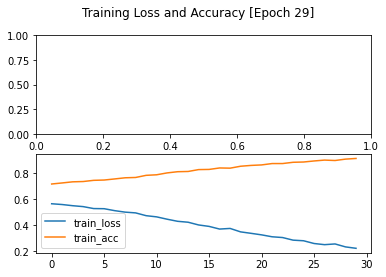

<Figure size 432x288 with 0 Axes>

Epoch 31/50
267/267 [==============================] - 16s 59ms/step - loss: 0.2250 - accuracy: 0.9089
End of epoch 31 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9089100360870361
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
Predicted : 0
Actual : 0.0


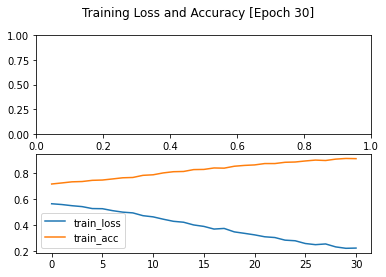

<Figure size 432x288 with 0 Axes>

Epoch 32/50
267/267 [==============================] - 16s 58ms/step - loss: 0.2149 - accuracy: 0.9141
End of epoch 32 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9141305685043335
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
Predicted : 0
Actual : 0.0


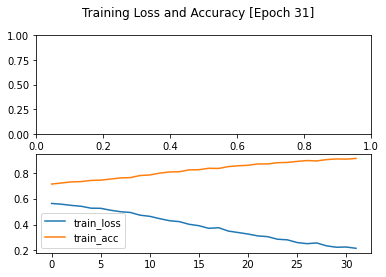

<Figure size 432x288 with 0 Axes>

Epoch 33/50
267/267 [==============================] - 16s 58ms/step - loss: 0.2158 - accuracy: 0.9115
End of epoch 33 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9114928245544434
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]
Predicted : 0
Actual : 0.0


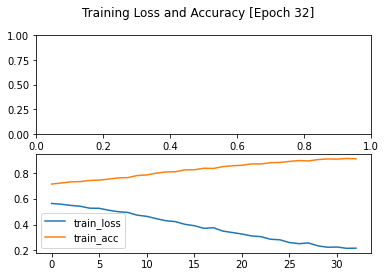

<Figure size 432x288 with 0 Axes>

Epoch 34/50
267/267 [==============================] - 16s 59ms/step - loss: 0.1934 - accuracy: 0.9227
End of epoch 34 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9227256774902344
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]
Predicted : 0
Actual : 0.0


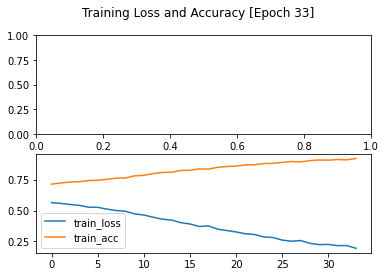

<Figure size 432x288 with 0 Axes>

Epoch 35/50
267/267 [==============================] - 16s 59ms/step - loss: 0.2059 - accuracy: 0.9179
End of epoch 35 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9179047346115112
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34]
Predicted : 0
Actual : 0.0


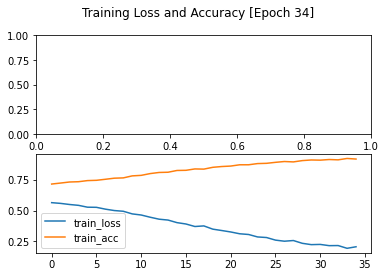

<Figure size 432x288 with 0 Axes>

Epoch 36/50
267/267 [==============================] - 16s 58ms/step - loss: 0.1895 - accuracy: 0.9253
End of epoch 36 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9253426790237427
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]
Predicted : 0
Actual : 0.0


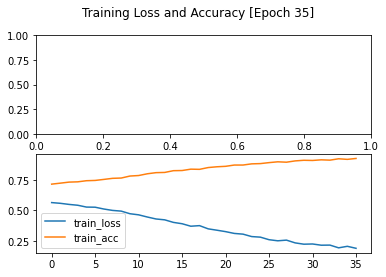

<Figure size 432x288 with 0 Axes>

Epoch 37/50
267/267 [==============================] - 16s 58ms/step - loss: 0.1926 - accuracy: 0.9231
End of epoch 37 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9231043457984924
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
Predicted : 0
Actual : 0.0


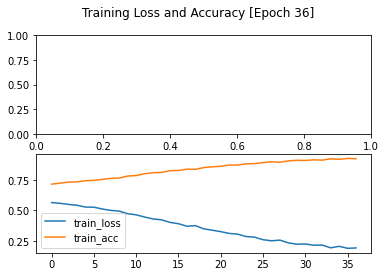

<Figure size 432x288 with 0 Axes>

Epoch 38/50
267/267 [==============================] - 16s 59ms/step - loss: 0.1817 - accuracy: 0.9273
End of epoch 38 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9273470640182495
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Predicted : 0
Actual : 0.0


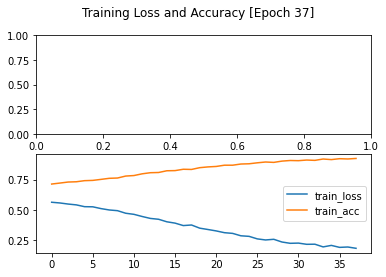

<Figure size 432x288 with 0 Axes>

Epoch 39/50
267/267 [==============================] - 14s 53ms/step - loss: 0.1653 - accuracy: 0.9363
End of epoch 39 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9363213181495667
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
Predicted : 0
Actual : 0.0


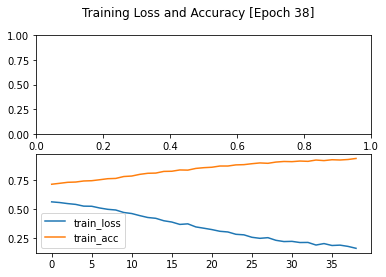

<Figure size 432x288 with 0 Axes>

Epoch 40/50
267/267 [==============================] - 16s 58ms/step - loss: 0.1713 - accuracy: 0.9330
End of epoch 40 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9329878091812134
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Predicted : 0
Actual : 0.0


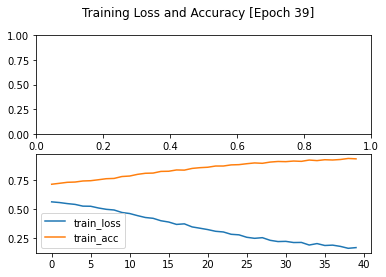

<Figure size 432x288 with 0 Axes>

Epoch 41/50
267/267 [==============================] - 16s 59ms/step - loss: 0.1548 - accuracy: 0.9407
End of epoch 41 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9407148361206055
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
Predicted : 0
Actual : 0.0


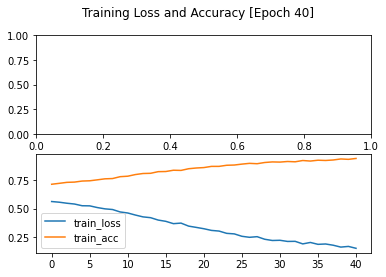

<Figure size 432x288 with 0 Axes>

Epoch 42/50
267/267 [==============================] - 16s 59ms/step - loss: 0.1705 - accuracy: 0.9330
End of epoch 42 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9329878687858582
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Predicted : 0
Actual : 0.0


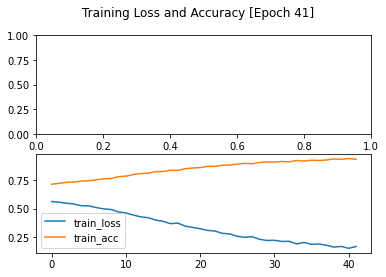

<Figure size 432x288 with 0 Axes>

Epoch 43/50
267/267 [==============================] - 16s 58ms/step - loss: 0.1457 - accuracy: 0.9431
End of epoch 43 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9431465268135071
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
Predicted : 0
Actual : 0.0


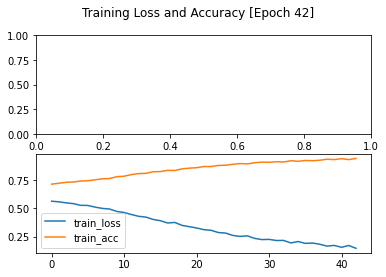

<Figure size 432x288 with 0 Axes>

Epoch 44/50
267/267 [==============================] - 16s 58ms/step - loss: 0.1426 - accuracy: 0.9463
End of epoch 44 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9463279843330383
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Predicted : 0
Actual : 0.0


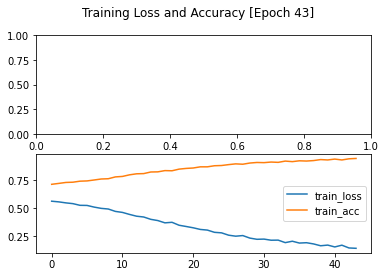

<Figure size 432x288 with 0 Axes>

Epoch 45/50
267/267 [==============================] - 16s 58ms/step - loss: 0.1442 - accuracy: 0.9441
End of epoch 45 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9441244006156921
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
Predicted : 0
Actual : 0.0


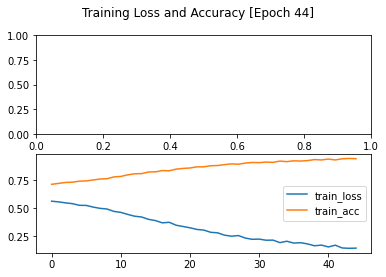

<Figure size 432x288 with 0 Axes>

Epoch 46/50
267/267 [==============================] - 16s 59ms/step - loss: 0.1253 - accuracy: 0.9523
End of epoch 46 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9522855877876282
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Predicted : 0
Actual : 0.0


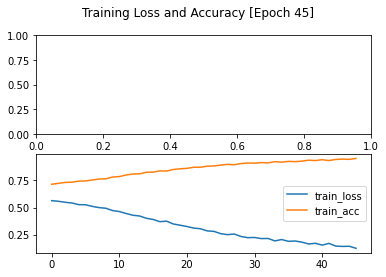

<Figure size 432x288 with 0 Axes>

Epoch 47/50
267/267 [==============================] - 16s 58ms/step - loss: 0.1518 - accuracy: 0.9425
End of epoch 47 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9424511194229126
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]
Predicted : 0
Actual : 0.0


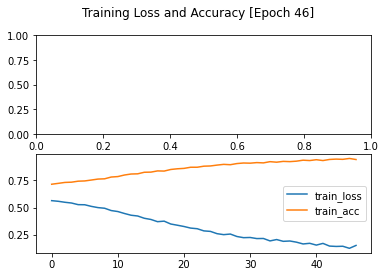

<Figure size 432x288 with 0 Axes>

Epoch 48/50
267/267 [==============================] - 16s 58ms/step - loss: 0.1493 - accuracy: 0.9420
End of epoch 48 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9420167207717896
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Predicted : 0
Actual : 0.0


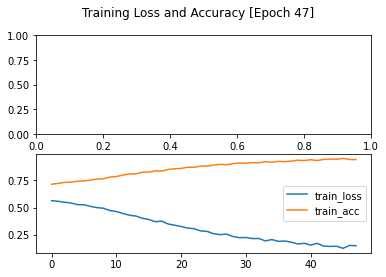

<Figure size 432x288 with 0 Axes>

Epoch 49/50
267/267 [==============================] - 16s 59ms/step - loss: 0.1248 - accuracy: 0.9526
End of epoch 49 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9526298642158508
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
Predicted : 0
Actual : 0.0


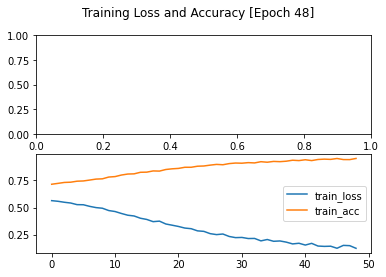

<Figure size 432x288 with 0 Axes>

Epoch 50/50
267/267 [==============================] - 16s 59ms/step - loss: 0.1357 - accuracy: 0.9482
End of epoch 50 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9482494592666626
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
Predicted : 0
Actual : 0.0


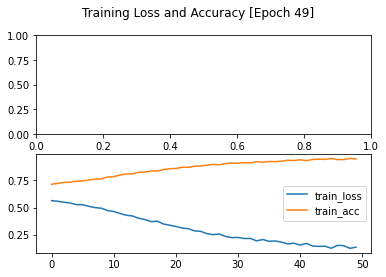

<Figure size 432x288 with 0 Axes>

In [107]:
# No callbacks
history = history1 = model.fit(X_train,batch_size=bs,
                   epochs = epochs,
                callbacks = [reduce_lr,plot_losses,early_stop])

In [108]:
model.save_weights('./weights/model__eeg1.h5')

In [109]:
model.load_weights('./weights/model__eeg1.h5')

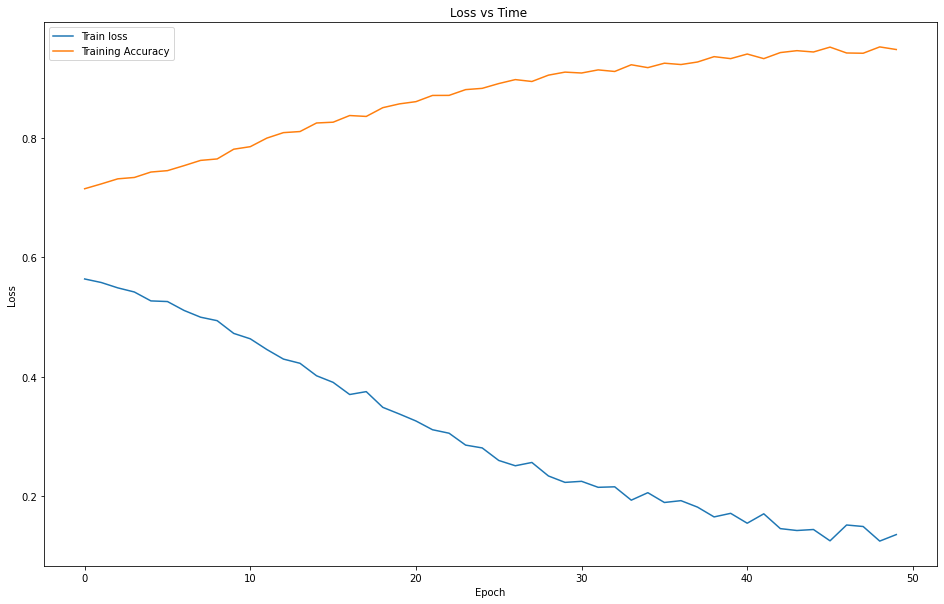

In [110]:
plt.figure(figsize = (16,10))
plt.plot(range(epochs),history1.history['loss'],label = 'Train loss')
plt.plot(range(epochs),history1.history['accuracy'],label = 'Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss vs Time ")
plt.legend()
plt.show()


In [111]:
train_X= np.reshape(train_X,(train_X.shape[0], train_X.shape[1],1))

print(train_X.shape)

test_X= np.reshape(test_X,(test_X.shape[0], test_X.shape[1],1))

print(test_X.shape)
print(test_y.shape)

(8541, 17, 1)
(2847, 17, 1)
(2847,)


In [112]:
model.evaluate(test_X,test_y)

89/89 [==============================] - 2s 13ms/step - loss: 0.6237 - accuracy: 0.8570


[0.6237057447433472, 0.8569804430007935]

In [113]:
y_true = np.array(test_y)
y_pred = np.squeeze(model.predict(test_X))
y_pred

array([[0.9946679 , 0.99701786, 0.9953811 , ..., 0.9961741 , 0.9978171 ,
        0.9940133 ],
       [0.85433996, 0.86192524, 0.85910594, ..., 0.821916  , 0.89104784,
        0.9146483 ],
       [0.99938726, 0.99957836, 0.9996215 , ..., 0.99989116, 0.9999316 ,
        0.99989223],
       ...,
       [0.96344256, 0.97868437, 0.97954744, ..., 0.9740702 , 0.98706114,
        0.99571586],
       [0.9995923 , 0.99943733, 0.999508  , ..., 0.99998516, 0.99999166,
        0.9999834 ],
       [0.9996301 , 0.99949944, 0.99957055, ..., 0.99997556, 0.9998293 ,
        0.99995154]], dtype=float32)

In [114]:
y_pred = np.array(y_pred >= 0.5, dtype = np.int)

In [115]:
y_pred

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [116]:
np.expand_dims(test_X[0],axis = 0)
model.predict(np.expand_dims(test_X[0],axis = 0))

array([[[0.9946679 ],
        [0.9970178 ],
        [0.9953811 ],
        [0.9949553 ],
        [0.99629456],
        [0.9960515 ],
        [0.99644905],
        [0.99626476],
        [0.9963726 ],
        [0.9956855 ],
        [0.9940324 ],
        [0.9914942 ],
        [0.9929413 ],
        [0.9947067 ],
        [0.9961741 ],
        [0.99781716],
        [0.99401325]]], dtype=float32)

In [117]:
layer_  = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.inputs, outputs = layer_)
activations = activation_model.predict(train_X[0])

In [118]:
first_layer_activation = activations[5]
first_layer_activation[0,:,].shape
# first_layer_activation= np.reshape(first_layer_activation,(first_layer_activation.shape[-1], first_layer_activation.shape[0],1))
print(first_layer_activation.shape)


(17, 1, 256)


In [121]:
# lstm - 65, 57 
# lstm + dropouts - 76, 69
# lstm + attention - 89 , 81 
# lstm + attention + dropouts - 94.8, 8 5

In [120]:
# for i in range(len(activations)):
#     if i>0:
#         first_layer_activation = activations[i]
#         if i == 3:
#             first_layer_activation = first_layer_activation[0]
#         #print(i)
#         list_ = []
#         for j in range(len(first_layer_activation.shape)):
#                # print(first_layer_activation, j)
#                 if i < 3 and  j not in list_:
#                     print(i)
#                     plt.matshow(first_layer_activation[0, :,])
#                     list_.append(j)
#                 elif i>3 and j not in list_ :
#                     print(i)
#                     if i == 5:
#                         plt.matshow(first_layer_activation[0,:,], cmap = 'viridis')
#                     else:
#                         plt.matshow(first_layer_activation.T[0,:,], cmap = 'viridis')
                       
#                 elif i == 3 and j not in list_:
#                     print(i)
#                     #print(first_layer_activation.shape)
#                     plt.matshow(first_layer_activation, cmap='viridis')
#                     list_.append(j)
